### Refitting after applying logs to numeric variables: Key reversal effect persists between Cluster 0 and 3

## Cluster characteristics summary
- Clusters 1 and 5 are the high spenders with high income.  Cluster 1 consists of loyalty customers but Cluster 5 customers spend the most per day.  They are similar in most key dimensions, with Cluster 1 being slightly better educated, having more children, and having slightly higher likelihood of having a  partner.  
- Clusters 0-2 are the loyalty customers and Clusters 3-5 are the newer customers. 
- Cluster 1 customers also have higher than average income, but probably have less disposable income due to having children
- Clusters 2-4 have lower income, are more likely to have children, and spend less


## Takeaways summary
- If run deals, target these at Clusters 2-4 
- Concentrate on making/keeping the web page appealing for Clusters 0, 1, and 5
- Make sure to have a polished catalog, especially for Cluster 5 customers, who could bring in the most revenue in the future
- Make customers’ in-store experience customers pleasant as high-spending clusters seem to value it
- Learn from Campaign 2 in order to not repeat it
- Concentrate on running and improving campaigns like Campaign1 and 5, as these attract the high-spending customers
- Concentrate on identifying and attracting customers like Cluster 5 for highest future expected revenue

### Future work
- It would be helpful to have more information about the data set and the store in order to answer the following questions:
 - What do we know about the rationale behind each campaign? What distinguishes the campaigns?
 - What more can we learn about our customers? Specifically, are there factors that differentiate Cluster 5 that are not in the data?
 - What else can be learned about the way the store is making customers in-store and online shopping experience pleasant? Are there way to improve?
 - Can the store learn to do profitable business with Cluster 2-4?
 - Do A/B testing to judge the effectiveness of recommendations


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import plotly.express as px

In [59]:
df = pd.read_csv('./data/marketing_data.csv')
#Preprocess Income
df['Income']=df[' Income ']
df['Income']=df.Income.str.replace('$','')
df['Income']=df.Income.str.replace(',','')#.astype("Int64")
df['Income']=df.Income.astype("float")
df['Income'].fillna((df['Income'].median()), inplace=True)
df = df.drop([' Income '], axis=1)
df.drop(df.index[[527,513,827,2233]],inplace=True) #drop income outlier 527 and age outliers
df['LogIncome'] = np.log1p(df['Income'])

#Preprocess Education
df.loc[df['Education']=='2n Cycle','Education']='Master'
df.loc[df['Education']=='Graduation','Education']='Bachelor'

#Preprocess Children
df['NumChildren']  = df['Kidhome']+df['Teenhome']
df['HasChildren']=np.where(df.NumChildren> 0, 1, 0)

#Preprocess Marital Status
df['HasPartner']=np.where(((df.Marital_Status== 'Married')|(df.Marital_Status== 'Together')), 1, 0)

#Preprocess Date and Make Age
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
df['age'] = 2014 - df['Year_Birth']

#Make total spending, num promotions, and num orders accepted columns
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] +\
        +df['MntSweetProducts'] + df['MntGoldProds']
df['AcceptedCmpTot']=df['AcceptedCmp1']+ df['AcceptedCmp2']+ df['AcceptedCmp3']+ df['AcceptedCmp4']+\
       + df['AcceptedCmp5']
df['NumTotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases']+df['NumCatalogPurchases']+\
    df['NumStorePurchases']+df['NumWebVisitsMonth']

# Make a column for spending normalized by length customer -> Consider doing this for other amounts as well
latest_date=(df["Dt_Customer"] + pd.to_timedelta(df['Recency'],'d')).max()
df['Len_Customer']=latest_date - df["Dt_Customer"]
df['Len_Customer']=df['Len_Customer'] / pd.to_timedelta(1, unit='D') #Convert to float
df['MntSpentNorm']=df['MntTotal']/df['Len_Customer']

In [60]:
df[df.age>100]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,LogIncome,NumChildren,HasChildren,HasPartner,age,MntTotal,AcceptedCmpTot,NumTotalPurchases,Len_Customer,MntSpentNorm


In [61]:
df[df.Income>300000]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,LogIncome,NumChildren,HasChildren,HasPartner,age,MntTotal,AcceptedCmpTot,NumTotalPurchases,Len_Customer,MntSpentNorm


In [62]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Income',
       'LogIncome', 'NumChildren', 'HasChildren', 'HasPartner', 'age',
       'MntTotal', 'AcceptedCmpTot', 'NumTotalPurchases', 'Len_Customer',
       'MntSpentNorm'],
      dtype='object')

In [63]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Income',
       'LogIncome', 'NumChildren', 'HasChildren', 'HasPartner', 'age',
       'MntTotal', 'AcceptedCmpTot', 'NumTotalPurchases', 'Len_Customer',
       'MntSpentNorm'],
      dtype='object')

In [64]:
nums_to_log = [  'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'Income','age']
for col in nums_to_log:
    df['Log'+col] = np.log1p(df[col])
#nums_log=df[[np.log1p(df[num]) for num in nums_to_log]]
nums_no_log = df[ ['Recency', 'Len_Customer']]
df=df.drop(nums_to_log,axis=1)

In [65]:
type(nums_no_log)

pandas.core.frame.DataFrame

In [66]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,LogIncome,NumChildren,HasChildren,HasPartner,MntTotal,AcceptedCmpTot,NumTotalPurchases,Len_Customer,MntSpentNorm,LogMntWines,LogMntFruits,LogMntMeatProducts,LogMntFishProducts,LogMntSweetProducts,LogMntGoldProds,LogNumDealsPurchases,LogNumWebPurchases,LogNumCatalogPurchases,LogNumStorePurchases,LogNumWebVisitsMonth,Logage
0,1826,1970,Bachelor,Divorced,0,0,2014-06-16,0,0,0,0,0,0,1,0,SP,11.348475,0,0,0,1190,0,16,110.0,10.818182,5.247024,4.653960,5.940171,4.718499,5.247024,5.389072,0.693147,1.609438,1.609438,1.945910,0.693147,3.806662
1,1,1961,Bachelor,Single,0,0,2014-06-15,0,0,0,0,0,1,1,0,CA,10.952419,0,0,0,577,1,23,111.0,5.198198,6.142037,1.791759,4.174387,2.079442,0.000000,3.637586,0.693147,2.079442,1.386294,2.079442,1.791759,3.988984
2,10476,1958,Bachelor,Married,0,1,2014-05-13,0,0,0,0,0,0,0,0,US,11.116440,1,1,1,251,0,13,144.0,1.743056,4.905275,2.484907,4.094345,2.772589,1.098612,3.433987,0.693147,1.386294,1.098612,1.791759,1.098612,4.043051
3,1386,1967,Bachelor,Together,1,1,2014-05-11,0,0,0,0,0,0,0,0,AUS,10.388226,2,1,1,11,0,11,146.0,0.075342,2.397895,0.000000,0.693147,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,1.098612,2.079442,3.871201
4,5371,1989,Bachelor,Single,1,0,2014-04-08,0,1,0,0,0,0,1,0,SP,9.974645,1,1,0,91,1,15,179.0,0.508380,1.945910,2.833213,3.218876,2.484907,0.000000,3.555348,1.098612,1.386294,0.693147,1.098612,2.079442,3.258097


In [67]:
cats = {'Education', 'Marital_Status', 
       'Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain','Country','HasChildren','HasPartner',}

In [68]:
X=df.drop(cats,axis=1)
X=X.drop({'ID','Dt_Customer','LogIncome','MntSpentNorm','MntTotal', 'AcceptedCmpTot','NumTotalPurchases','Year_Birth'} ,axis=1)

In [69]:
# cats = {'Education', 'Marital_Status', 
#        'Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
#        'AcceptedCmp2', 'Response', 'Complain','Country','HasChildren','HasPartner',}
# # for var in cats:
# #     df[var] = df[var].astype('category').cat.codes


# nums = (set(df.columns) -set(cats)) - {'ID','Dt_Customer','LogIncome','MntSpentNorm','MntTotal', 'AcceptedCmpTot','NumTotalPurchases','Year_Birth'} #drop some highly correlated transformed vars
# nums=[np.log1p(df[num]) for num in nums]
# #X = df.drop(list(nums),axis=1) #Dropping Dt_Customer since this is causing problems in RF
# X = df[list(nums)] #Dropping Dt_Customer since this is causing problems in RF

In [70]:
pd.set_option('display.max_columns', 500)

In [71]:
X.head()

,Recency,NumChildren,Len_Customer,LogMntWines,LogMntFruits,LogMntMeatProducts,LogMntFishProducts,LogMntSweetProducts,LogMntGoldProds,LogNumDealsPurchases,LogNumWebPurchases,LogNumCatalogPurchases,LogNumStorePurchases,LogNumWebVisitsMonth,Logage
0,0,0,110.0,5.247024,4.653960,5.940171,4.718499,5.247024,5.389072,0.693147,1.609438,1.609438,1.945910,0.693147,3.806662
1,0,0,111.0,6.142037,1.791759,4.174387,2.079442,0.000000,3.637586,0.693147,2.079442,1.386294,2.079442,1.791759,3.988984
2,0,1,144.0,4.905275,2.484907,4.094345,2.772589,1.098612,3.433987,0.693147,1.386294,1.098612,1.791759,1.098612,4.043051
3,0,2,146.0,2.397895,0.000000,0.693147,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,1.098612,2.079442,3.871201
4,0,1,179.0,1.945910,2.833213,3.218876,2.484907,0.000000,3.555348,1.098612,1.386294,0.693147,1.098612,2.079442,3.258097


In [72]:
np.shape(X)

(2236, 15)

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X)

In [74]:
num_components=np.shape(X)[1]

Elbow Method:


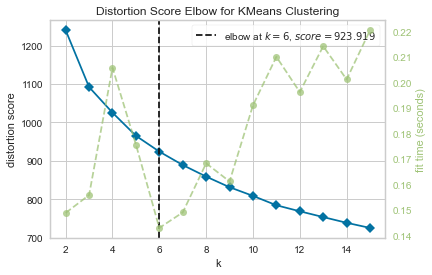

In [75]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method:')
Elbow_M = KElbowVisualizer(KMeans(), k=num_components, random_seed=42) #for the 20 numeric
Elbow_M.fit(data_rescaled) 
Elbow_M.show();

##### From a high level, our KMeans algorithm follows the below steps in order to find optimal cluster groups:

1. Select k as the number of groups to cluster for
2. Randomly pick k points in our data as centroid points
3. Assign each non-centroid point to its closest centroid
4. Recalculate centroid points by taking the average of all surrounding points assigned to that cluster
5. Repeat steps 3-4 until calculated centroid points do not move anymore. Done
- Source: https://philippeheitzmann.com/2022/01/implementing-kmeans-clustering/

In [76]:
n_clusters=6

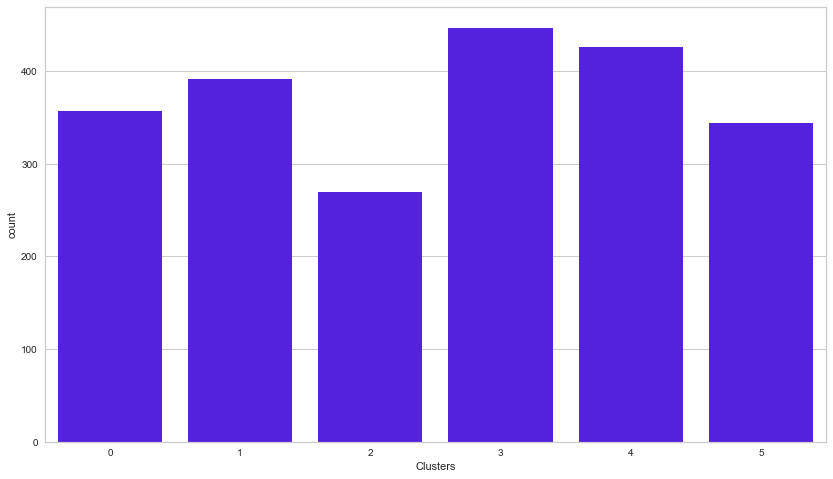

In [79]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Clusters'] = kmeans.fit_predict(data_rescaled)

#data_rescaled = pd.DataFrame(data_rescaled, columns = X.columns)

#data_rescaled['Clusters'] = df["Clusters"]

plt.figure(figsize=(14, 8))
sns.countplot(x='Clusters', data=df,hue=None,color='#4503fc',)
plt.show()

In [80]:
df.Clusters.value_counts()

3    447
4    426
1    392
0    357
5    344
2    270
Name: Clusters, dtype: int64

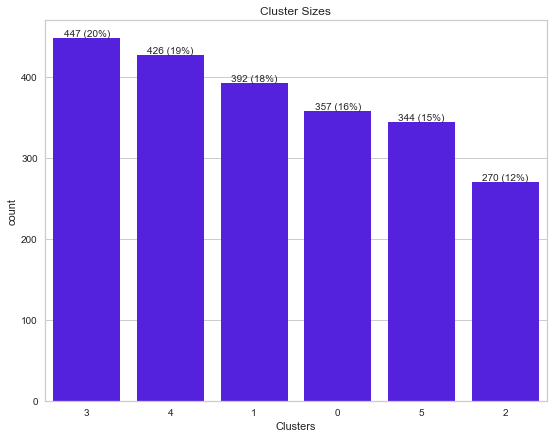

In [81]:
# Code hint from https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
plt.figure(figsize=(9, 7))

ax = sns.countplot(x=df['Clusters'], data=df,hue=None,color='#4503fc',order=df['Clusters'].value_counts(ascending=False).index);
        
abs_values = df['Clusters'].value_counts(ascending=False)
rel_values = df['Clusters'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title("Cluster Sizes")

plt.savefig('./figures/clusters_sizes.png')


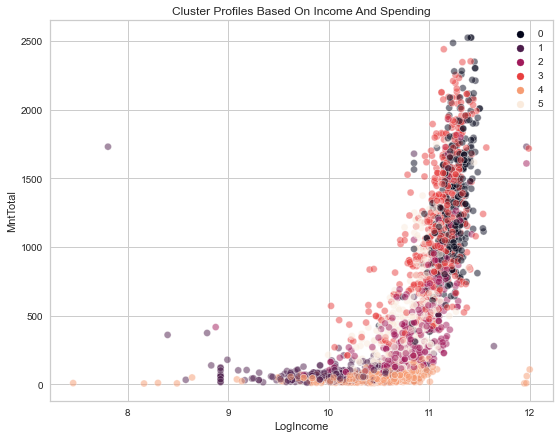

In [83]:
plt.figure(figsize=(9, 7))
palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.scatterplot(data = df,x=df["LogIncome"], y=df["MntTotal"],hue=df["Clusters"],alpha=.5,palette=palette)

plot.set_title("Cluster Profiles Based On Income And Spending")
plt.savefig('./figures/income_mnttotal_clusters.pdf')#, bbox_inches='tight')
plt.legend()
plt.show()

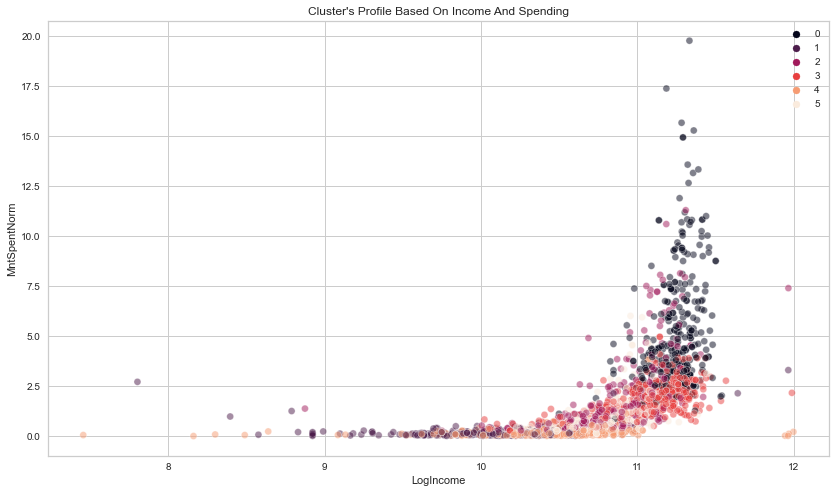

In [85]:
plt.figure(figsize=(14, 8))
palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.scatterplot(data = df,x=df["LogIncome"], y=df["MntSpentNorm"],hue=df["Clusters"],alpha=.5,palette=palette)

plot.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [86]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain',
       'Country', 'LogIncome', 'NumChildren', 'HasChildren', 'HasPartner',
       'MntTotal', 'AcceptedCmpTot', 'NumTotalPurchases', 'Len_Customer',
       'MntSpentNorm', 'LogMntWines', 'LogMntFruits', 'LogMntMeatProducts',
       'LogMntFishProducts', 'LogMntSweetProducts', 'LogMntGoldProds',
       'LogNumDealsPurchases', 'LogNumWebPurchases', 'LogNumCatalogPurchases',
       'LogNumStorePurchases', 'LogNumWebVisitsMonth', 'Logage', 'Clusters'],
      dtype='object')

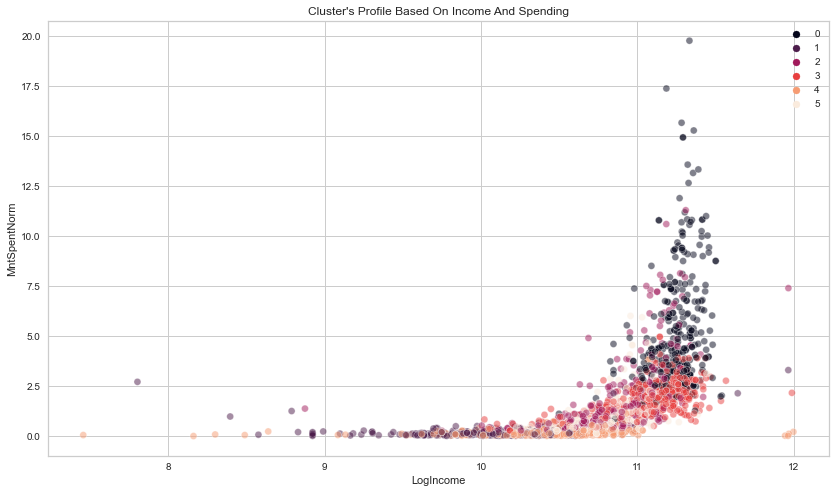

In [88]:
plt.figure(figsize=(14, 8))
palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.scatterplot(data = df,x=df["LogIncome"], y=df["MntSpentNorm"],hue=df["Clusters"],alpha=.5,palette=palette)

plot.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [89]:
df["Clusters"].value_counts()

3    447
4    426
1    392
0    357
5    344
2    270
Name: Clusters, dtype: int64

<AxesSubplot:>

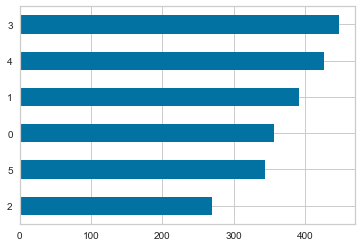

In [90]:
df.Clusters.value_counts().sort_values().plot(kind = 'barh')

In [91]:
groupsKmeans=df.groupby(['Clusters'])#.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

In [92]:
groupsKmeans.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

ID                                               Year_Birth  \
         count      sum min    max         mean          std      count   
Clusters                                                                  
0          357  1993206   0  11074  5583.210084  3216.595697        357   
1          392  2230360  35  11191  5689.693878  3173.811853        392   
2          270  1529306   1  11188  5664.096296  3147.119569        270   
3          447  2452238  17  11112  5485.991051  3315.311110        447   
4          426  2421229  13  11181  5683.636150  3278.072674        426   
5          344  1870684   9  11171  5438.034884  3308.671819        344   

                                                     Kidhome               \
             sum   min   max         mean        std   count  sum min max   
Clusters                                                                    
0         702540  1941  1995  1967.899160  13.589732     357    8   0   1   
1         774968  1945  1996  1976.959184   9.814305     392  278   0   2   
2         530861  1943  1991  1966.151852  11.173650     270   83   0   2   
3         879543  1943  1995  1967.657718  11.760753     447   58   0   2   
4         838384  1940  1991  1968.037559   9.995928     426  392   0   2   
5         676160  1946  1989  1965.581395   9.707339     344  174   0   2   

                             Teenhome                                   \
              mean       std    count  sum min max      mean       std   
Clusters                                                                 
0         0.022409  0.148217      357   47   0   2  0.131653  0.346784   
1         0.709184  0.465832      392   48   0   1  0.122449  0.328223   
2         0.307407  0.478089      270  188   0   2  0.696296  0.549066   
3         0.129754  0.343009      447  233   0   2  0.521253  0.530564   
4         0.920188  0.483337      426  300   0   2  0.704225  0.515027   
5         0.505814  0.550612      344  317   0   2  0.921512  0.434922   

         Recency                                      AcceptedCmp3          \
           count    sum min max       mean        std        count sum min   
Clusters                                                                     
0            357  17030   0  99  47.703081  28.653123          357  29   0   
1            392  15651   0  99  39.926020  27.926962          392  35   0   
2            270  16476   0  99  61.022222  28.086157          270  12   0   
3            447  22723   0  99  50.834452  28.751672          447  31   0   
4            426  22865   0  99  53.673709  27.911610          426  24   0   
5            344  15079   0  99  43.834302  28.213759          344  32   0   

                                 AcceptedCmp4                                  \
         max      mean       std        count sum min max      mean       std   
Clusters                                                                        
0          1  0.081232  0.273575          357  38   0   1  0.106443  0.308836   
1          1  0.089286  0.285520          392   2   0   1  0.005102  0.071337   
2          1  0.044444  0.206463          270  28   0   1  0.103704  0.305442   
3          1  0.069351  0.254335          447  42   0   1  0.093960  0.292100   
4          1  0.056338  0.230844          426   7   0   1  0.016432  0.127279   
5          1  0.093023  0.290888          344  50   0   1  0.145349  0.352966   

         AcceptedCmp5                                 AcceptedCmp1          \
                count sum min max      mean       std        count sum min   
Clusters                                                                     
0                 357  90   0   1  0.252101  0.434828          357  72   0   
1                 392   0   0   0  0.000000  0.000000          392   0   0   
2                 270  12   0   1  0.044444  0.206463          270  14   0   
3                 447  52   0   1  0.116331  0.320981          447  44   0

In [93]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,LogIncome,NumChildren,HasChildren,HasPartner,MntTotal,AcceptedCmpTot,NumTotalPurchases,Len_Customer,MntSpentNorm,LogMntWines,LogMntFruits,LogMntMeatProducts,LogMntFishProducts,LogMntSweetProducts,LogMntGoldProds,LogNumDealsPurchases,LogNumWebPurchases,LogNumCatalogPurchases,LogNumStorePurchases,LogNumWebVisitsMonth,Logage,Clusters
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,5589.008497,1968.898032,0.444097,0.506708,49.116279,0.072898,0.074687,0.072451,0.064401,0.013417,0.149374,0.008945,10.753375,0.950805,0.715116,0.644902,605.986583,0.297853,20.191413,450.773256,1.653348,4.675586,2.238664,4.128168,2.534431,2.240753,3.121202,1.078744,1.477896,1.006118,1.801522,1.750949,3.796602,2.547853
std,3244.826887,11.703281,0.538459,0.544609,28.957284,0.260027,0.262944,0.259291,0.245520,0.115077,0.356536,0.094173,0.500319,0.752204,0.451460,0.478650,601.865156,0.678737,7.291811,202.181561,2.173188,1.803369,1.570010,1.560354,1.658129,1.593969,1.287692,0.471357,0.562022,0.771376,0.486548,0.465254,0.267234,1.691653
min,0.000000,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.456455,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,97.000000,0.009276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.944439,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.477386,0.000000,0.000000,0.000000,69.000000,0.000000,14.000000,277.750000,0.202060,3.218876,0.693147,2.833213,1.386294,0.693147,2.302585,0.693147,1.098612,0.000000,1.386294,1.386294,3.637586,1.000000
50%,5454.500000,1970.000000,0.000000,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.847053,1.000000,1.000000,1.000000,396.500000,0.000000,19.000000,453.000000,0.866443,5.164786,2.197225,4.219508,2.564949,2.197225,3.218876,1.098612,1.609438,1.098612,1.791759,1.945910,3.806662,3.000000
75%,8421.750000,1977.000000,1.000000,1.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.131325,1.000000,1.000000,1.000000,1045.500000,0.000000,25.000000,626.000000,2.270000,6.225053,3.526361,5.451038,3.931826,3.526361,4.043051,1.386294,1.945910,1.609438,2.197225,2.079442,4.025352,4.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.997805,3.000000,1.000000,1.000000,2525.000000,4.000000,46.000000,796.000000,19.788991,7.309212,5.298317,7.453562,5.560682,5.575949,5.894403,2.772589,3.332205,3.367296,2.639057,3.044522,4.317488,5.000000


[461487.0, 33823.0, 135385.0, 522163.99999999994, 22961.0, 179166.0]
['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']


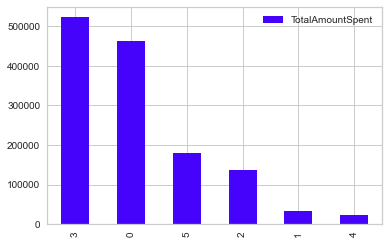

In [94]:
cluster_mnt_totals = [[]]*n_clusters

for i in range(n_clusters):
    cluster_i=df[df["Clusters"]==i]
    cluster_mnt_totals[i] = cluster_i.MntTotal.mean()*len(cluster_i)

print(cluster_mnt_totals) 

columns = ['cluster'+str(i) for i in range(n_clusters)]
print(columns)

df_cluster_mnt_totals = pd.DataFrame([cluster_mnt_totals], columns = ['cluster'+str(i) for i in range(n_clusters)])

df_cluster_mnt_totals=df_cluster_mnt_totals.T.reset_index().rename({0:'TotalAmountSpent'},axis=1)

df_cluster_mnt_totals.sort_values('TotalAmountSpent', ascending=False).plot.bar(color='#4503fc')
plt.savefig('./figures/total_spent.png')


[1766.3418472942271, 79.19491637171345, 560.5291256733026, 840.8281934600172, 96.20512700834254, 353.7867740665365]
['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']


<AxesSubplot:>

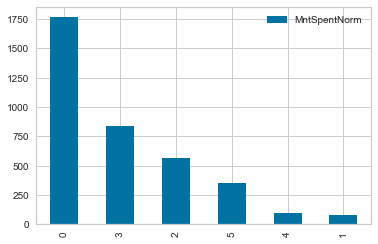

In [95]:
cluster_mnt_totals = [[]]*n_clusters

for i in range(n_clusters):
    cluster_i=df[df["Clusters"]==i]
    cluster_mnt_totals[i] = cluster_i.MntSpentNorm.mean()*len(cluster_i)

print(cluster_mnt_totals) 

columns = ['cluster'+str(i) for i in range(n_clusters)]
print(columns)

df_cluster_mnt_totals = pd.DataFrame([cluster_mnt_totals], columns = ['cluster'+str(i) for i in range(n_clusters)])

df_cluster_mnt_totals=df_cluster_mnt_totals.T.reset_index().rename({0:'MntSpentNorm'},axis=1)

df_cluster_mnt_totals.sort_values('MntSpentNorm', ascending=False).plot.bar()

<!-- # Description of Customer Behavior
- Clusters 2 and 4 are big clusters that spend little
- Clusters 2 and 4  are usually educated, relatively recent customers, but are much more likely to have children than Clusters 1 and 3. Perhaps this store focuses on high-end more expensive products (Whole Foods at Monterey?) and people with children are finding it harder to afford shopping there, on average.  Cluster 5 customers have about just as likely to have children as Clusters 2 and 4, yet have a higher income.  
- To confirm these findings, Clusters 2, 4, and 5 are making the most deal purchases, especially when these are normalized by length someone spend as a customer.
 -->

In [96]:
#palette=sns.color_palette("rocket")
palette=sns.color_palette("Set2")

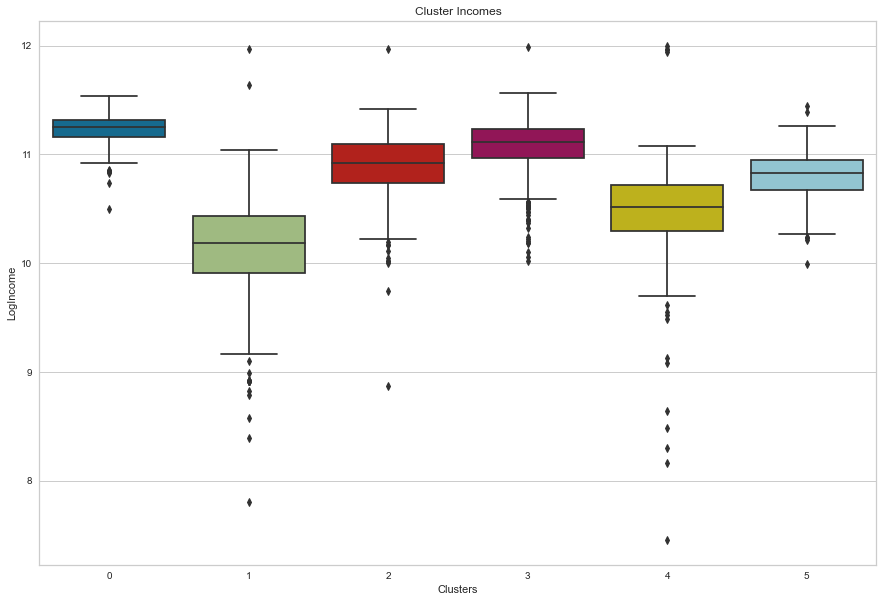

In [98]:
plt.figure(figsize=(15, 10))
palette=sns.color_palette("rocket", as_cmap=True)

plot=sns.boxplot(x="Clusters", y="LogIncome",
            data=df)

plot.set_title("Cluster Incomes")
plt.savefig('./figures/income_clusters_box.png')
plt.show()

In [99]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,LogIncome,NumChildren,HasChildren,HasPartner,MntTotal,AcceptedCmpTot,NumTotalPurchases,Len_Customer,MntSpentNorm,LogMntWines,LogMntFruits,LogMntMeatProducts,LogMntFishProducts,LogMntSweetProducts,LogMntGoldProds,LogNumDealsPurchases,LogNumWebPurchases,LogNumCatalogPurchases,LogNumStorePurchases,LogNumWebVisitsMonth,Logage,Clusters
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,5589.008497,1968.898032,0.444097,0.506708,49.116279,0.072898,0.074687,0.072451,0.064401,0.013417,0.149374,0.008945,10.753375,0.950805,0.715116,0.644902,605.986583,0.297853,20.191413,450.773256,1.653348,4.675586,2.238664,4.128168,2.534431,2.240753,3.121202,1.078744,1.477896,1.006118,1.801522,1.750949,3.796602,2.547853
std,3244.826887,11.703281,0.538459,0.544609,28.957284,0.260027,0.262944,0.259291,0.245520,0.115077,0.356536,0.094173,0.500319,0.752204,0.451460,0.478650,601.865156,0.678737,7.291811,202.181561,2.173188,1.803369,1.570010,1.560354,1.658129,1.593969,1.287692,0.471357,0.562022,0.771376,0.486548,0.465254,0.267234,1.691653
min,0.000000,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.456455,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,97.000000,0.009276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.944439,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.477386,0.000000,0.000000,0.000000,69.000000,0.000000,14.000000,277.750000,0.202060,3.218876,0.693147,2.833213,1.386294,0.693147,2.302585,0.693147,1.098612,0.000000,1.386294,1.386294,3.637586,1.000000
50%,5454.500000,1970.000000,0.000000,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.847053,1.000000,1.000000,1.000000,396.500000,0.000000,19.000000,453.000000,0.866443,5.164786,2.197225,4.219508,2.564949,2.197225,3.218876,1.098612,1.609438,1.098612,1.791759,1.945910,3.806662,3.000000
75%,8421.750000,1977.000000,1.000000,1.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.131325,1.000000,1.000000,1.000000,1045.500000,0.000000,25.000000,626.000000,2.270000,6.225053,3.526361,5.451038,3.931826,3.526361,4.043051,1.386294,1.945910,1.609438,2.197225,2.079442,4.025352,4.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.997805,3.000000,1.000000,1.000000,2525.000000,4.000000,46.000000,796.000000,19.788991,7.309212,5.298317,7.453562,5.560682,5.575949,5.894403,2.772589,3.332205,3.367296,2.639057,3.044522,4.317488,5.000000


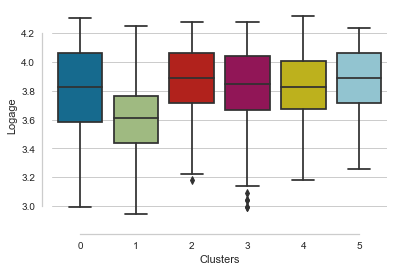

In [102]:
sns.boxplot(x="Clusters", y="Logage",
            data=df)
sns.despine(offset=10, trim=True)

### Age is similar across clusters, with median age in the 40s

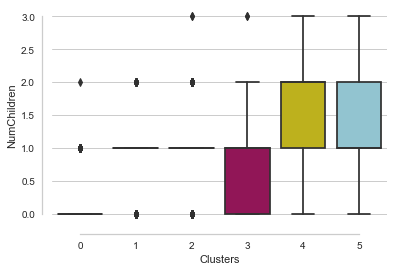

In [103]:
sns.boxplot(x="Clusters", y="NumChildren",
            data=df)
sns.despine(offset=10, trim=True)

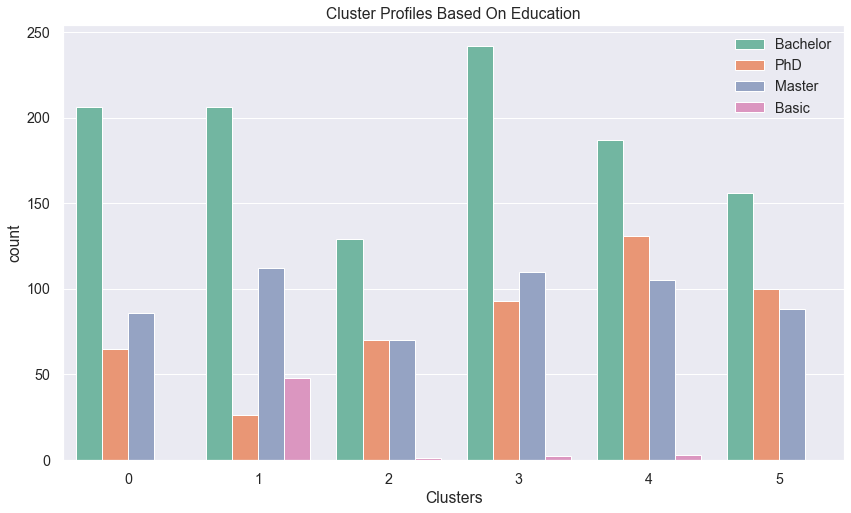

In [106]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["Clusters"],hue=df["Education"], palette = palette)

plot.set_title("Cluster Profiles Based On Education")
plt.legend()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


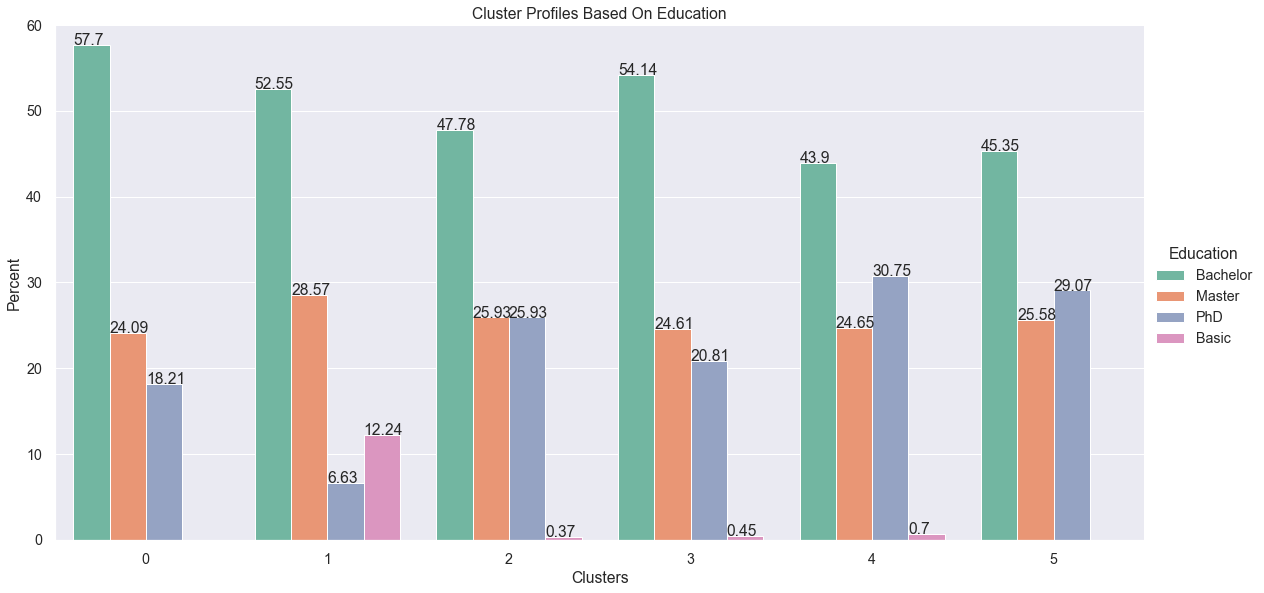

In [107]:
#plt.figure(figsize=(14,8)) #does not work, use height and aspect
palette=sns.color_palette("Set2")
sns.set(font_scale = 1.3)

x,y = 'Clusters', 'Education'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette,height=8,aspect=2)
#g.figure(figsize=(14,8))

g.ax.set_ylim(0,60)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) #+ '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    #plt.figure(figsize=(14,8))
    #plt.figure(figsize=(14,8))
plt.title("Cluster Profiles Based On Education")
plt.savefig('./figures/edu_clusters.png')

In [108]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain',
       'Country', 'LogIncome', 'NumChildren', 'HasChildren', 'HasPartner',
       'MntTotal', 'AcceptedCmpTot', 'NumTotalPurchases', 'Len_Customer',
       'MntSpentNorm', 'LogMntWines', 'LogMntFruits', 'LogMntMeatProducts',
       'LogMntFishProducts', 'LogMntSweetProducts', 'LogMntGoldProds',
       'LogNumDealsPurchases', 'LogNumWebPurchases', 'LogNumCatalogPurchases',
       'LogNumStorePurchases', 'LogNumWebVisitsMonth', 'Logage', 'Clusters'],
      dtype='object')

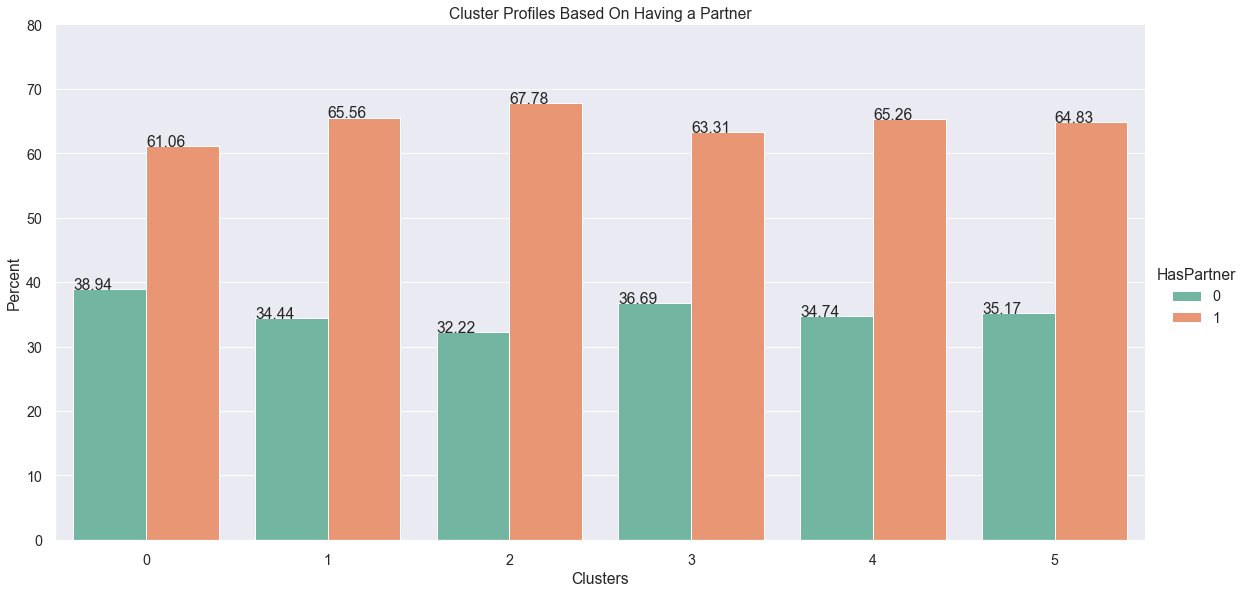

In [109]:
#plt.figure(figsize=(14,8)) #does not work, use height and aspect
palette=sns.color_palette("Set2")
sns.set(font_scale = 1.3)

x,y = 'Clusters', 'HasPartner'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette,height=8,aspect=2)
#g.figure(figsize=(14,8))

g.ax.set_ylim(0,80)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) #+ '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    #plt.figure(figsize=(14,8))
    #plt.figure(figsize=(14,8))
plt.title("Cluster Profiles Based On Having a Partner")
plt.savefig('./figures/partner_clusters.png')

In [110]:
groupsKmeansEdu=df.groupby(['Clusters','Education']).agg(['count'])

In [111]:
groupsKmeansEdu

ID Year_Birth Marital_Status Kidhome Teenhome  \
                   count      count          count   count    count   
Clusters Education                                                    
0        Bachelor    206        206            206     206      206   
         Master       86         86             86      86       86   
         PhD          65         65             65      65       65   
1        Bachelor    206        206            206     206      206   
         Basic        48         48             48      48       48   
         Master      112        112            112     112      112   
         PhD          26         26             26      26       26   
2        Bachelor    129        129            129     129      129   
         Basic         1          1              1       1        1   
         Master       70         70             70      70       70   
         PhD          70         70             70      70       70   
3        Bachelor    242        242            242     242      242   
         Basic         2          2              2       2        2   
         Master      110        110            110     110      110   
         PhD          93         93             93      93       93   
4        Bachelor    187        187            187     187      187   
         Basic         3          3              3       3        3   
         Master      105        105            105     105      105   
         PhD         131        131            131     131      131   
5        Bachelor    156        156            156     156      156   
         Master       88         88             88      88       88   
         PhD         100        100            100     100      100   

                   Dt_Customer Recency AcceptedCmp3 AcceptedCmp4 AcceptedCmp5  \
                         count   count        count        count        count   
Clusters Education                                                              
0        Bachelor          206     206          206          206          206   
         Master             86      86           86           86           86   
         PhD                65      65           65           65           65   
1        Bachelor          206     206          206          206          206   
         Basic              48      48           48           48           48   
         Master            112     112          112          112          112   
         PhD                26      26           26           26           26   
2        Bachelor          129     129          129          129          129   
         Basic               1       1            1            1            1   
         Master             70      70           70           70           70   
         PhD                70      70           70           70           70   
3        Bachelor          242     242          242          242          242   
         Basic               2       2            2            2            2   
         Master            110     110          110          110          110   
         PhD                93      93           93           93           93   
4        Bachelor          187     187          187          187          187   
         Basic               3       3            3            3            3   
         Master            105     105          105          105          105   
         PhD               131     131          131          131          131   
5        Bachelor          156     156          156          156          156   
         Master             88      88           88           88           88   
         PhD               100     100          100          100          100   

                   AcceptedCmp1 AcceptedCmp2 Response Complain Country  \
                          count        count    count    count   count   
Clusters Education                                                      

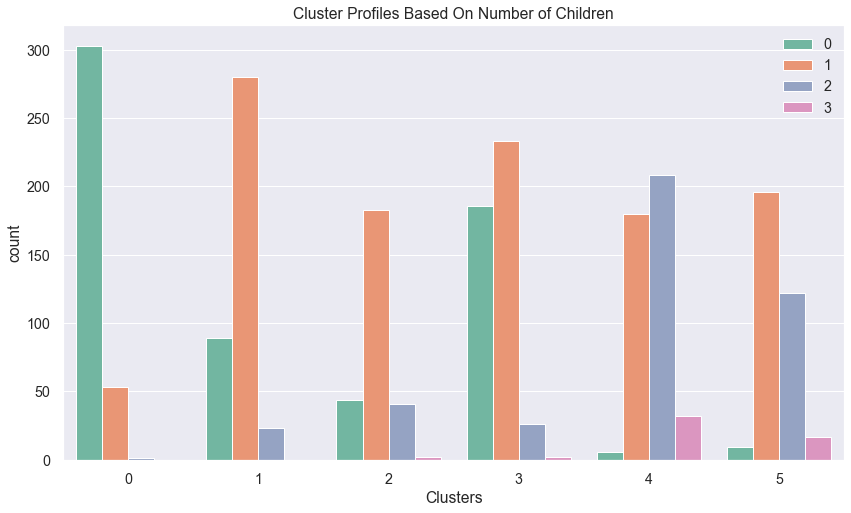

In [112]:
plt.figure(figsize=(14, 8))
palette=sns.color_palette("Set2")

#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["Clusters"],hue=df["NumChildren"], palette = palette)

plot.set_title("Cluster Profiles Based On Number of Children")
plt.savefig('./figures/child_clusters.png')
plt.legend()
plt.show()

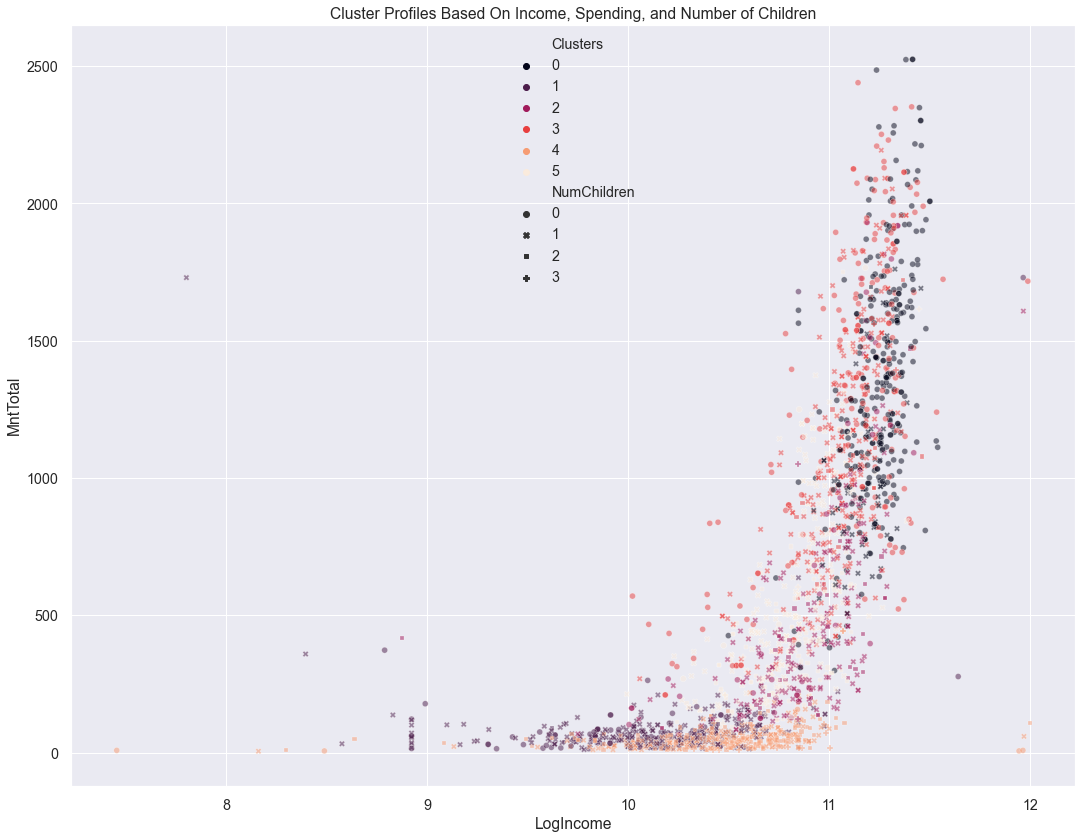

In [118]:
plt.figure(figsize=(18, 14))
palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.scatterplot(data = df,x=df["LogIncome"], y=df["MntTotal"],hue=df["Clusters"],alpha=.5,palette=palette,style=df['NumChildren'])

plot.set_title("Cluster Profiles Based On Income, Spending, and Number of Children")
plt.savefig('./figures/income_mnttotal_child_clusters.pdf')#, bbox_inches='tight')
plt.legend()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


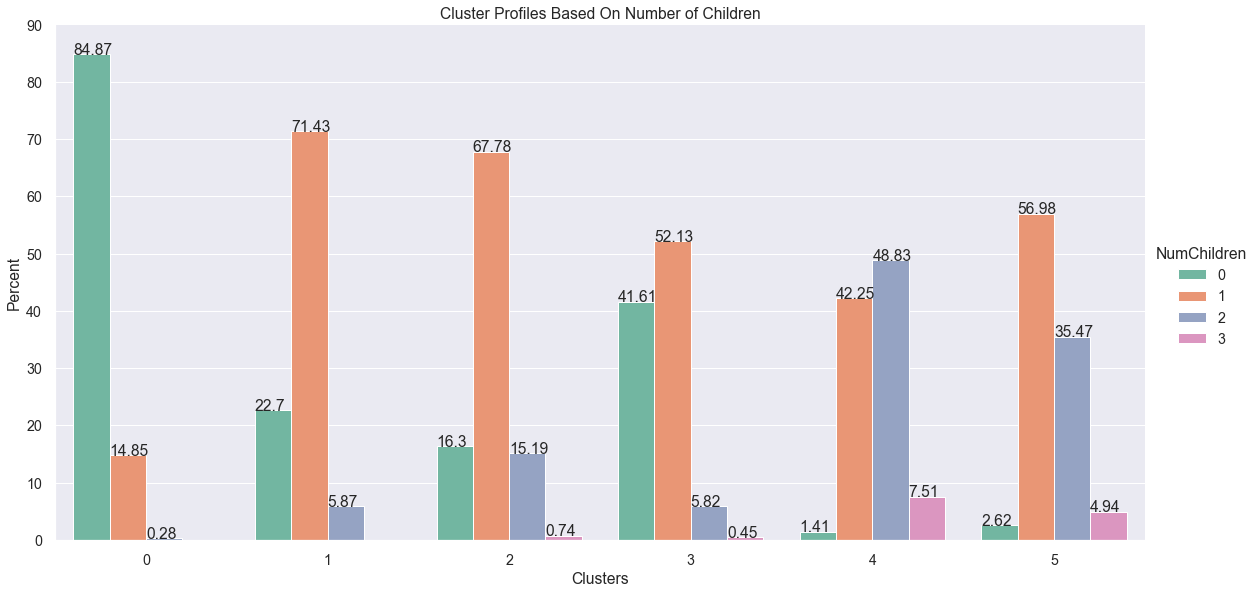

In [119]:
#plt.figure(figsize=(14,8)) #does not work, use height and aspect
sns.set(font_scale = 1.3)
palette=sns.color_palette("Set2")

x,y = 'Clusters', 'NumChildren'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette,height=8,aspect=2)
#g = sns.countplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette,height=8,aspect=2)
#plot = sns.countplot(x=df["Clusters"],hue=df["NumChildren"], palette = palette)


#g.figure(figsize=(14,8))

g.ax.set_ylim(0,90)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) #+ '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    #plt.figure(figsize=(14,8))
    #plt.figure(figsize=(14,8))
plt.title('Cluster Profiles Based On Number of Children')

plt.savefig('./figures/child_clusters.png')

In [120]:
### Most customers in Clusters 1 and 3 don't have children, but Cluster 1 customers are likelier to have at least one child

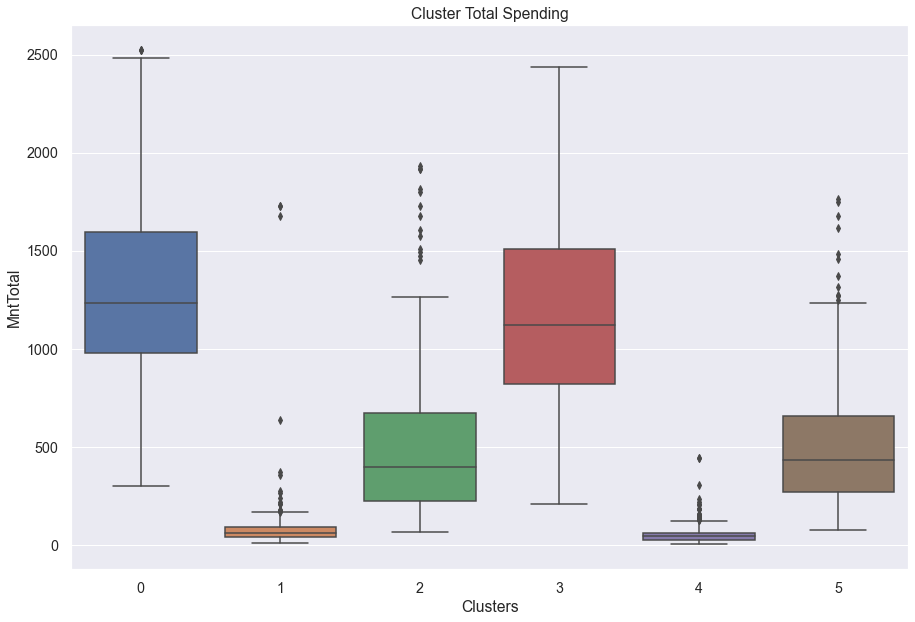

In [121]:
plt.figure(figsize=(15, 10))
palette=sns.color_palette("rocket", as_cmap=True)

plot=sns.boxplot(x="Clusters", y="MntTotal",
            data=df)

plot.set_title("Cluster Total Spending")
plt.savefig('./figures/mnttotal_clusters_box.png')
plt.show()

In [122]:
### Cluster 3 customers have the highest median overall spending, followed by Cluster 1 and 5 customers

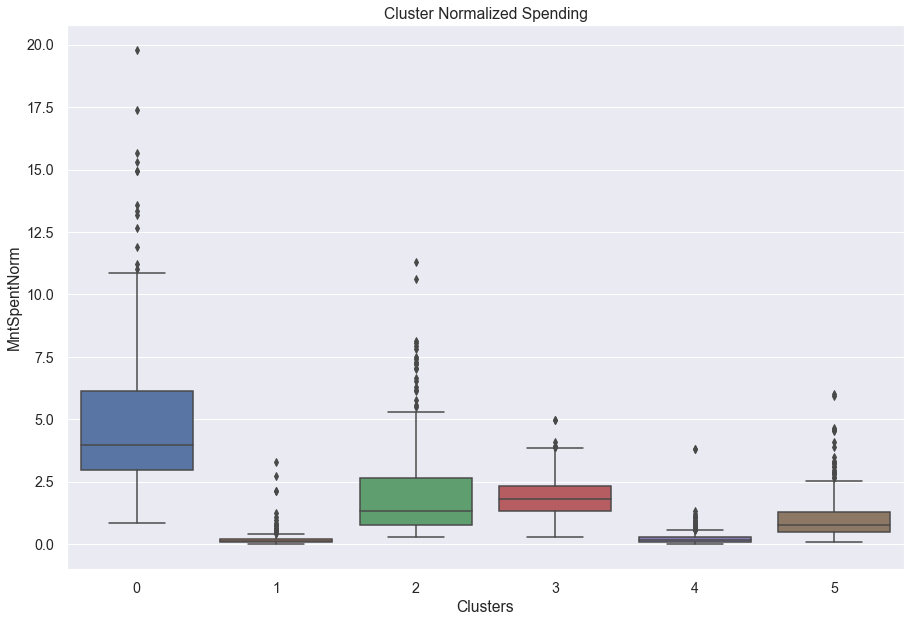

In [123]:
plt.figure(figsize=(15, 10))
palette=sns.color_palette("rocket", as_cmap=True)

plot=sns.boxplot(x="Clusters", y="MntSpentNorm",
            data=df)

plot.set_title("Cluster Normalized Spending")
plt.savefig('./figures/mnt_norm_clusters_box.png')
plt.show()

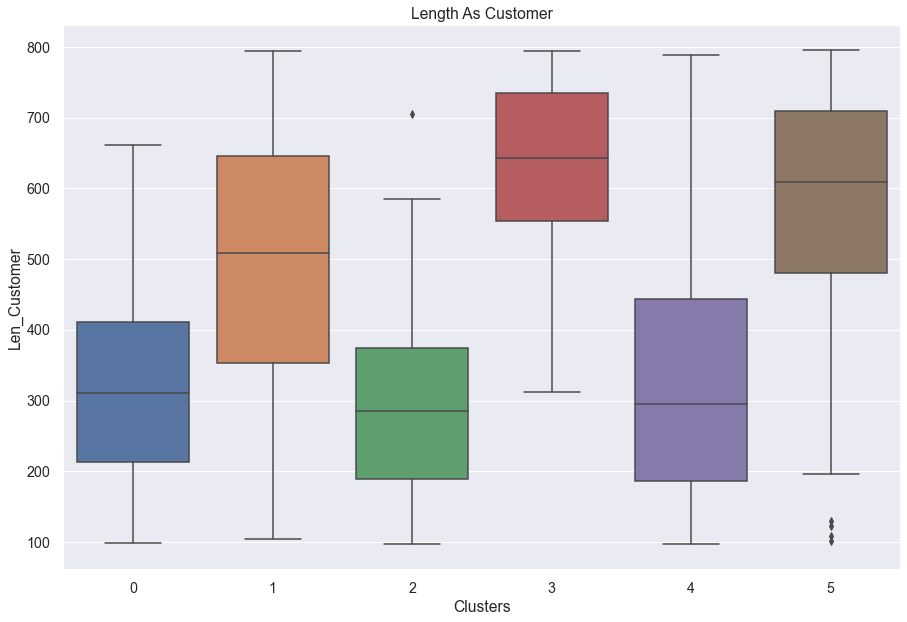

In [124]:
plt.figure(figsize=(15, 10))
palette=sns.color_palette("rocket", as_cmap=True)

plot=sns.boxplot(x="Clusters", y="Len_Customer",
            data=df)

plot.set_title("Length As Customer")
plt.savefig('./figures/length_customer_box.png')
plt.show()


In [127]:
df['MntWinesNorm']=df['LogMntWines']/df['Len_Customer']

df['MntFruitsNorm']=df['LogMntFruits']/df['Len_Customer']

df['MntMeatProductsNorm']=df['LogMntMeatProducts']/df['Len_Customer']

df['MntFishProductsNorm']=df['LogMntFishProducts']/df['Len_Customer']

df['MntSweetProductsNorm']=df['LogMntSweetProducts']/df['Len_Customer']

df['MntGoldProdsNorm']=df['LogMntGoldProds']/df['Len_Customer']

df['NumDealsPurchasesNorm']=df['LogNumDealsPurchases']/df['Len_Customer']

df['NumWebPurchasesNorm']=df['LogNumWebPurchases']/df['Len_Customer']

df['NumStorePurchasesNorm']=df['LogNumStorePurchases']/df['Len_Customer']

df['NumWebVisitsMonthNorm']=df['LogNumWebVisitsMonth']/df['Len_Customer']

df['NumCatalogPurchasesNorm']=df['LogNumCatalogPurchases']/df['Len_Customer']

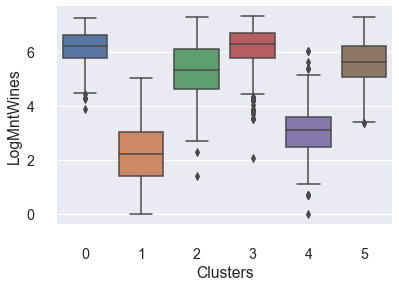

In [129]:
sns.boxplot(x="Clusters", y="LogMntWines",
            data=df)
sns.despine(offset=10, trim=True)

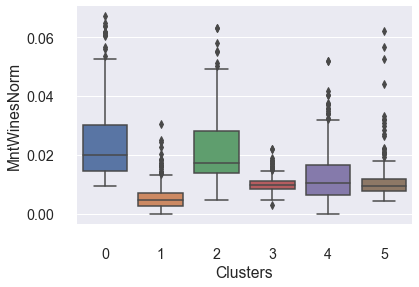

In [132]:
sns.boxplot(x="Clusters", y="MntWinesNorm",
            data=df)
sns.despine(offset=10, trim=True)

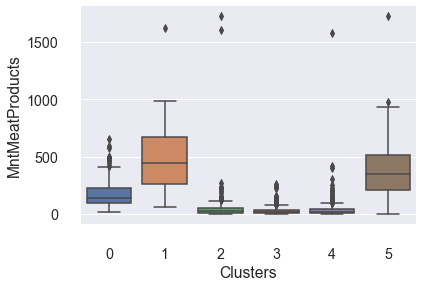

In [56]:
sns.boxplot(x="Clusters", y="MntMeatProducts",
            data=df)
sns.despine(offset=10, trim=True)

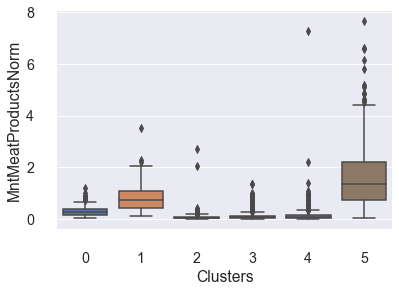

In [57]:
sns.boxplot(x="Clusters", y="MntMeatProductsNorm",
            data=df)
sns.despine(offset=10, trim=True)

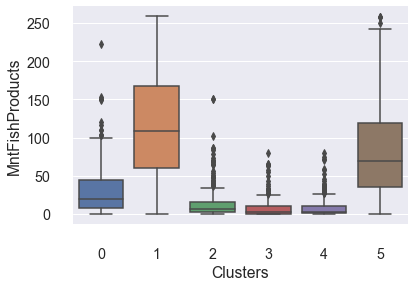

In [58]:
sns.boxplot(x="Clusters", y="MntFishProducts",
            data=df)
sns.despine(offset=10, trim=True)

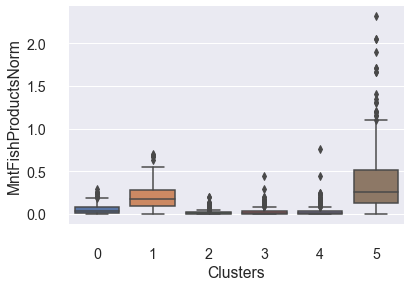

In [59]:
sns.boxplot(x="Clusters", y="MntFishProductsNorm",
            data=df)
sns.despine(offset=10, trim=True)

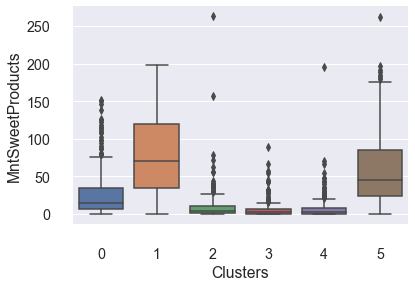

In [60]:
sns.boxplot(x="Clusters", y="MntSweetProducts",
            data=df)
sns.despine(offset=10, trim=True)

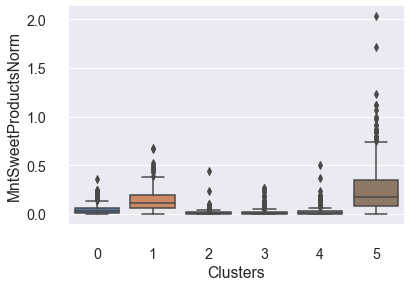

In [61]:
sns.boxplot(x="Clusters", y="MntSweetProductsNorm",
            data=df)
sns.despine(offset=10, trim=True)

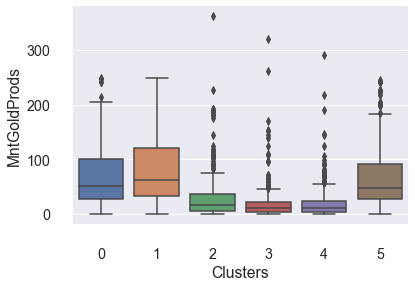

In [62]:
sns.boxplot(x="Clusters", y="MntGoldProds",
            data=df)
sns.despine(offset=10, trim=True)

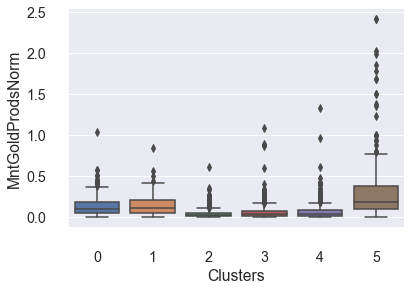

In [63]:
sns.boxplot(x="Clusters", y="MntGoldProdsNorm",
            data=df)
sns.despine(offset=10, trim=True)

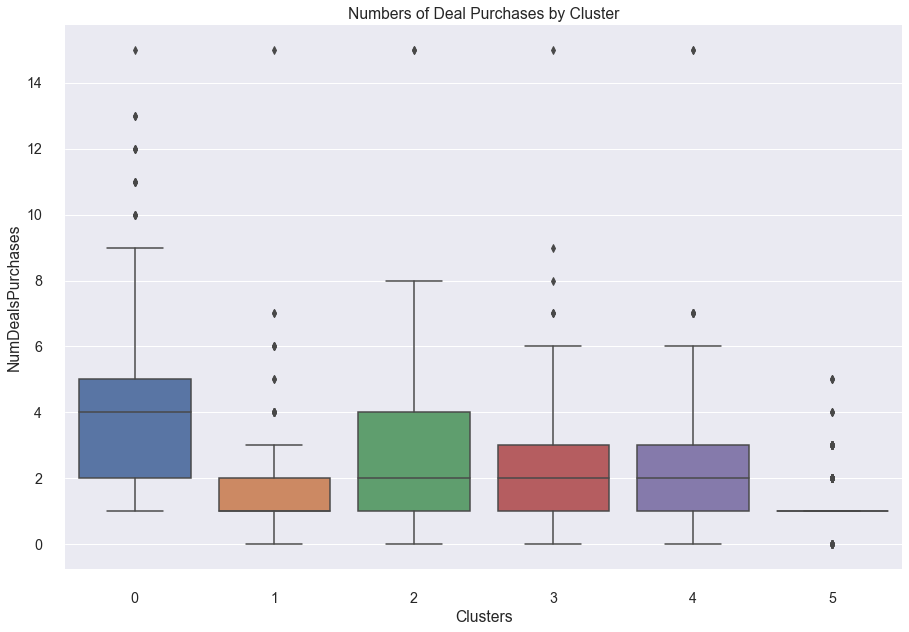

In [67]:
plt.figure(figsize=(15, 10))
plot=sns.boxplot(x="Clusters", y="NumDealsPurchases",
            data=df)
sns.despine(offset=10, trim=True)
plot.set_title("Numbers of Deal Purchases by Cluster")

plt.savefig('./figures/num_deals.png')

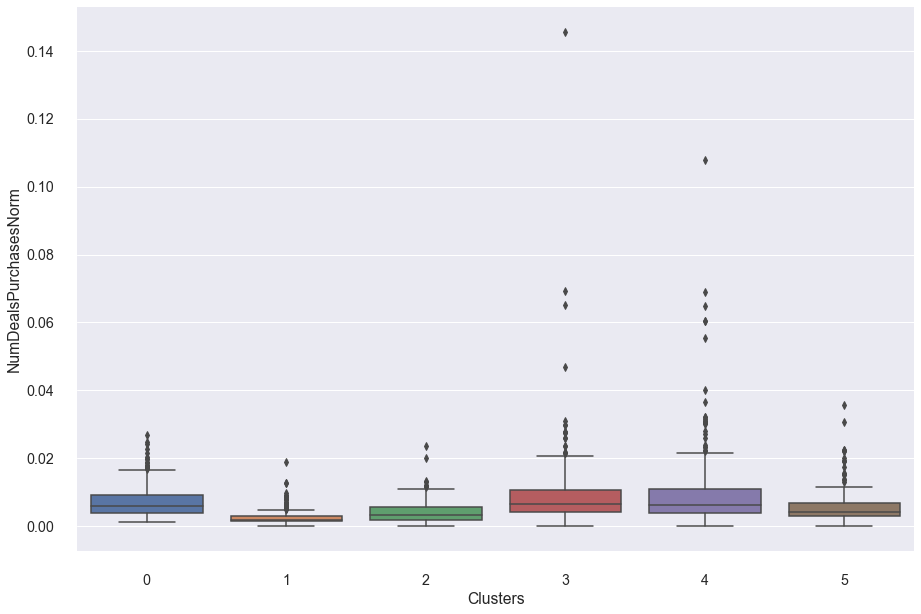

In [103]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="Clusters", y="NumDealsPurchasesNorm",
            data=df)
sns.despine(offset=10, trim=True)
plot.set_title("Numbers of Deal Purchases by Cluster (Normalized)")

plt.savefig('./figures/num_deals_norm.png')

In [55]:
### Clusters 1 and 3 rarely go for deal purchases compared to Cluster 5, for example.  Cluster 5 customers are much more likely to have at least one child than clusters 1 and 3.  

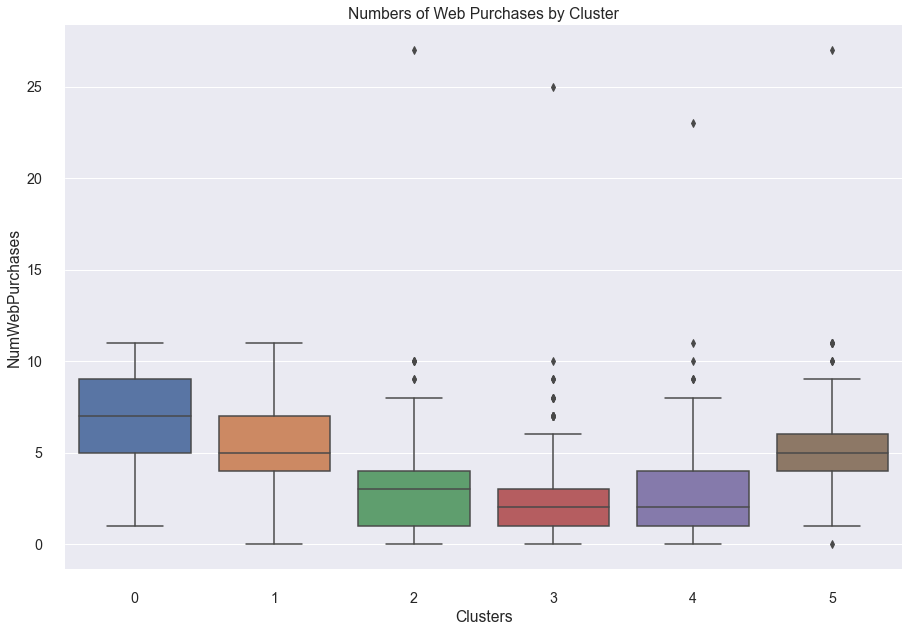

In [110]:
plt.figure(figsize=(15, 10))

sns.boxplot(x="Clusters", y="NumWebPurchases",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Web Purchases by Cluster")

plt.savefig('./figures/num_web.png')

# STOP EXPERIMENTATION HERE

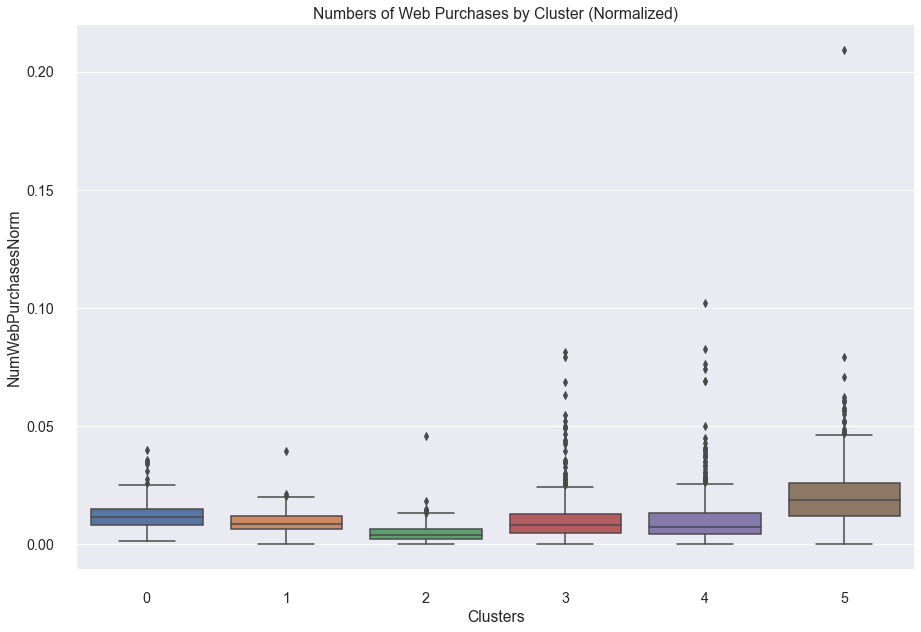

In [109]:
plt.figure(figsize=(15, 10))

sns.boxplot(x="Clusters", y="NumWebPurchasesNorm",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Web Purchases by Cluster (Normalized)")

plt.savefig('./figures/num_web_norm.png')

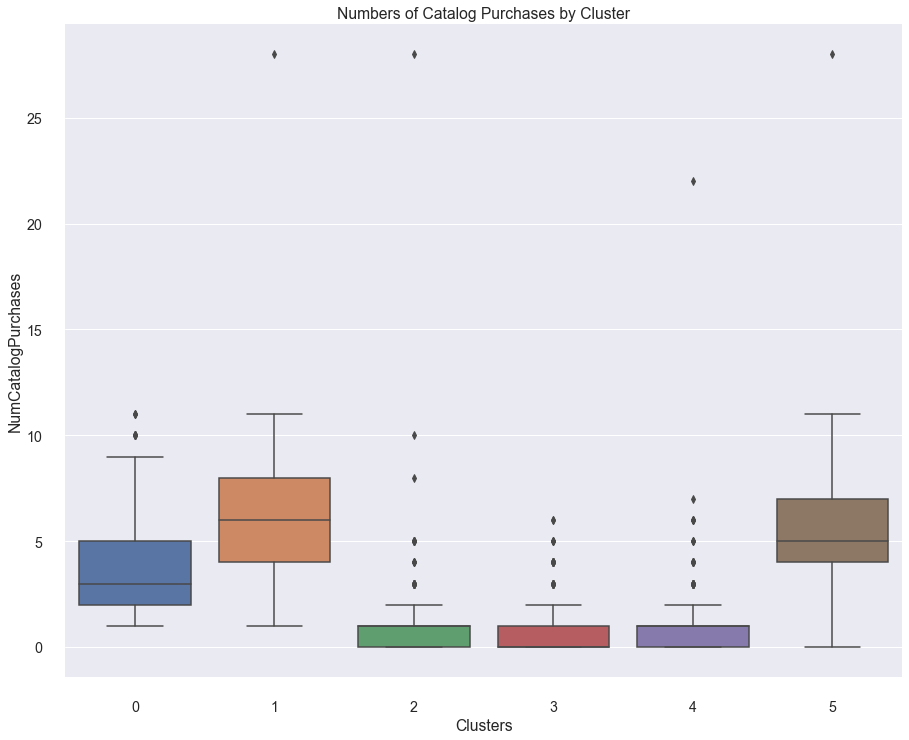

In [111]:
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumCatalogPurchases",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Catalog Purchases by Cluster")

plt.savefig('./figures/num_catalog.png')

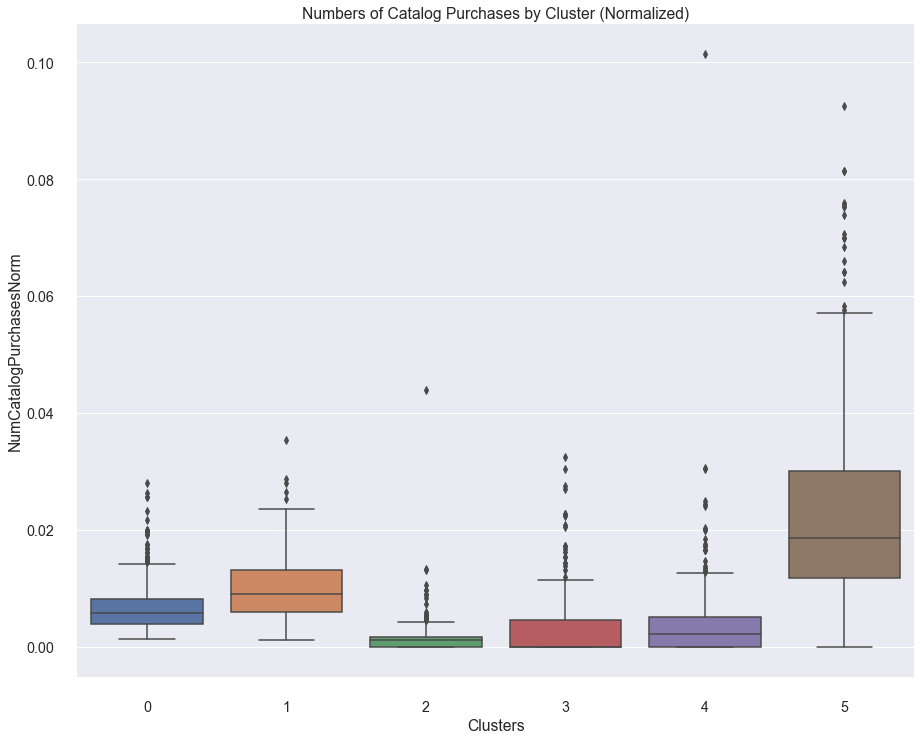

In [113]:
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumCatalogPurchasesNorm",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Catalog Purchases by Cluster (Normalized)")

plt.savefig('./figures/num_catalog_norm.png')

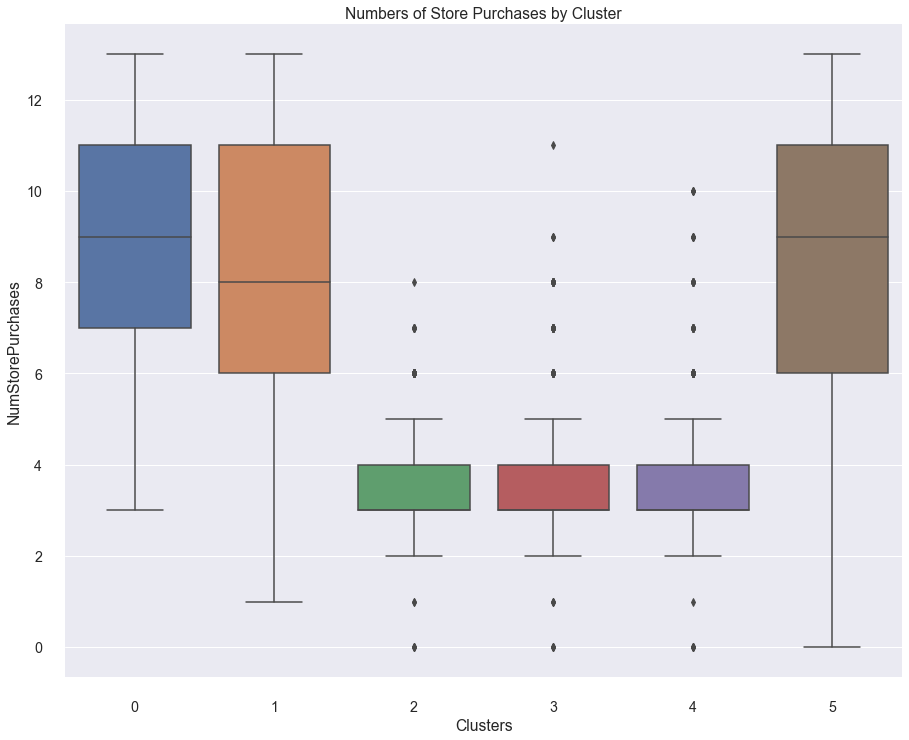

In [118]:
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumStorePurchases",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Store Purchases by Cluster")

plt.savefig('./figures/num_store.png')

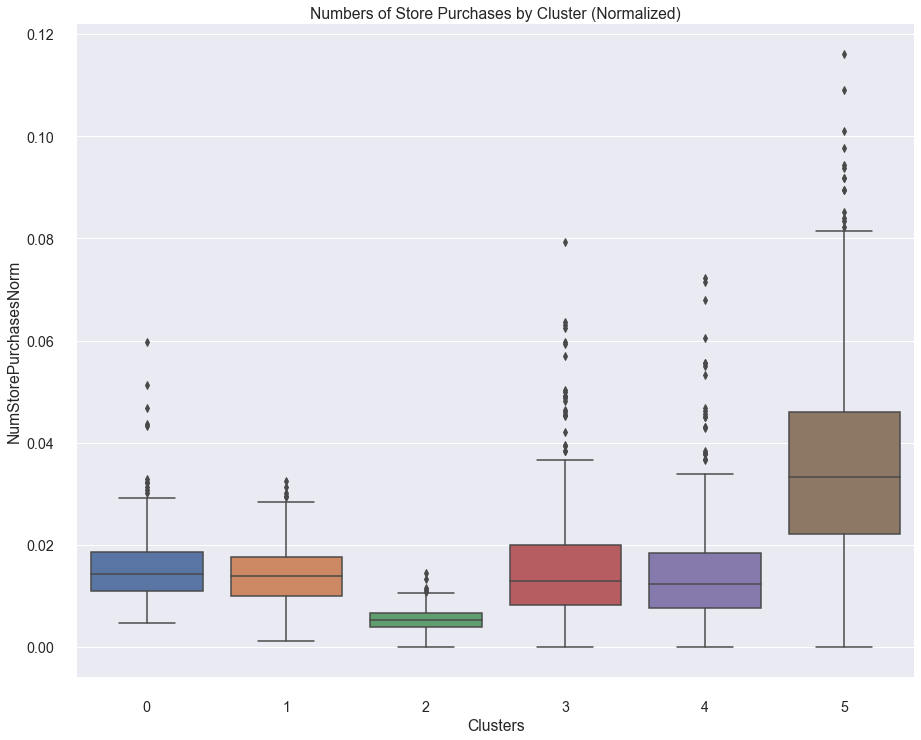

In [117]:
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumStorePurchasesNorm",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Store Purchases by Cluster (Normalized)")

plt.savefig('./figures/num_store_norm.png')

In [62]:
# When normalized, Cluster 1 makes the most web, catalog and in-store puchases.  
# Cluster 3 relatively prone to catalog purchases
# Cluster 5 relatively prone to web purchases

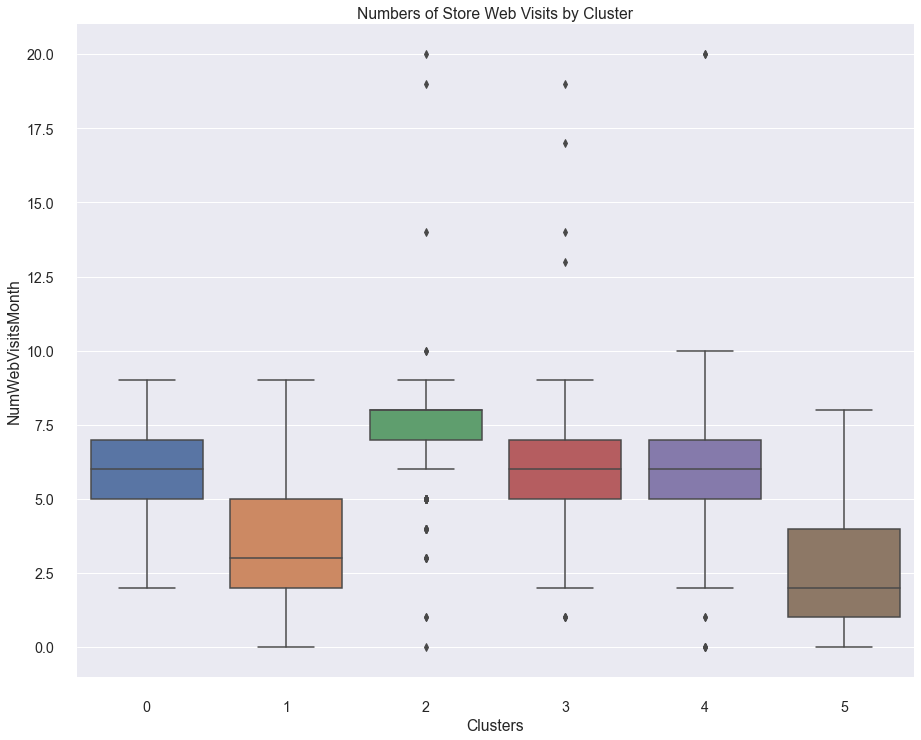

In [120]:
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumWebVisitsMonth",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Store Web Visits by Cluster")

plt.savefig('./figures/num_web_visits.png')

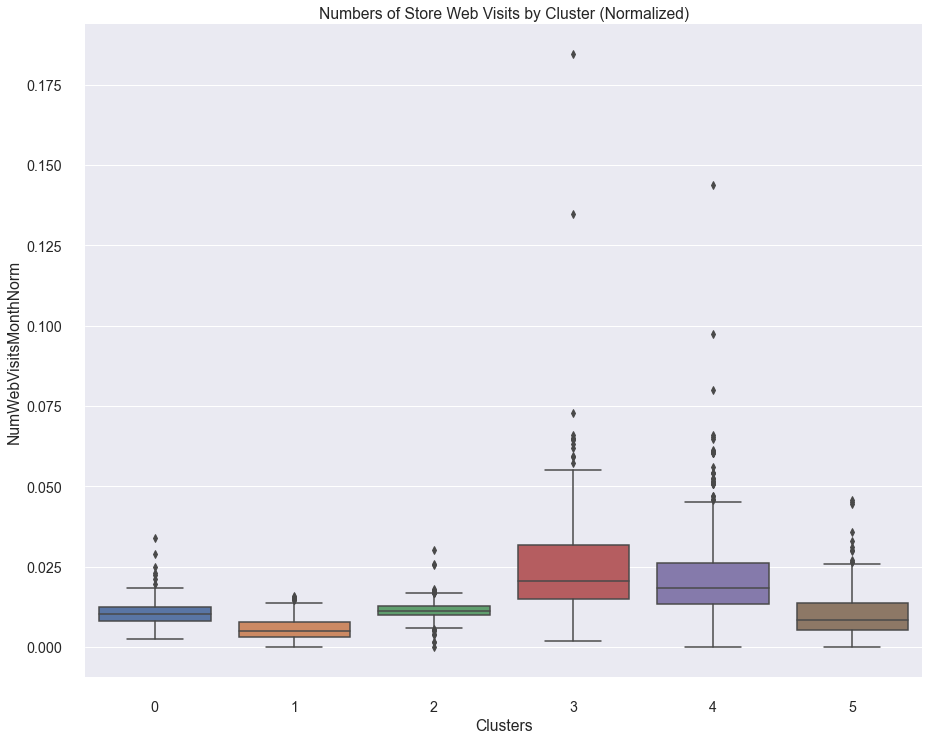

In [121]:
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumWebVisitsMonthNorm",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Store Web Visits by Cluster (Normalized)")

plt.savefig('./figures/num_web_visits_norm.png')

In [65]:
# Cluster 2 visit the web the most.  Cluster 4 is also active on the web.  Target a campaign for them there by giving them targeted deals!

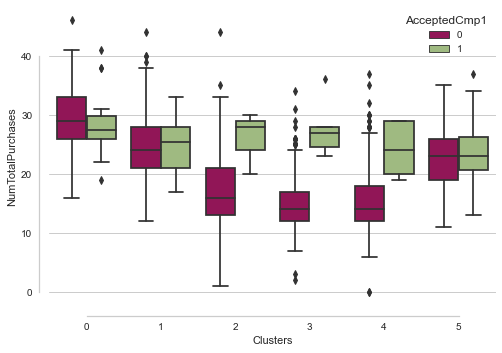

In [140]:
sns.boxplot(x="Clusters", y="NumTotalPurchases",
            hue="AcceptedCmp1", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

In [66]:
### Although 1 spend less than 3 total, their spending normalized by length as customers is much higher!
### Focus on attracting this recent revenue-bringing group

<AxesSubplot:xlabel='Clusters', ylabel='MntSpentNorm'>

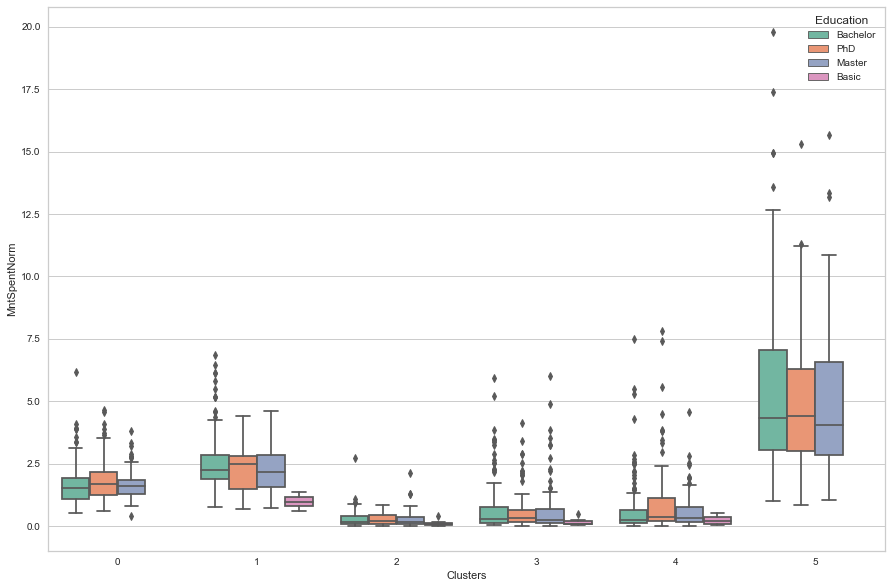

In [141]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="Clusters", y="MntSpentNorm",
            hue="Education", palette=palette,
            data=df)
#sns.despine(offset=10, trim=True)

### Overall, higher-educated customers spend more

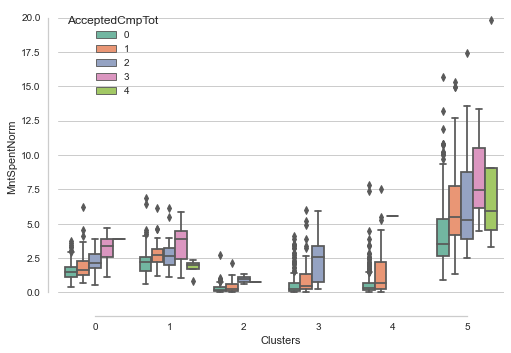

In [142]:
sns.boxplot(x="Clusters", y="MntSpentNorm",
            hue="AcceptedCmpTot", palette=palette,
            data=df)
sns.despine(offset=10, trim=True)
## Cluster 2 spend a lot and accept many promotions

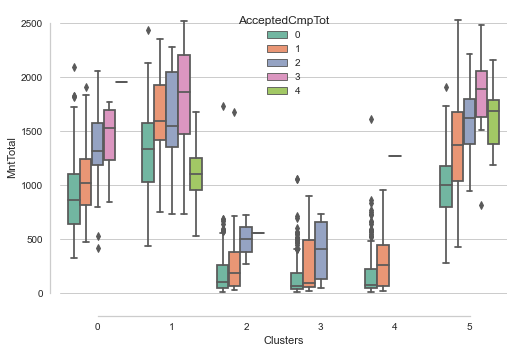

In [143]:
sns.boxplot(x="Clusters", y="MntTotal",
            hue="AcceptedCmpTot", palette=palette,
            data=df)
sns.despine(offset=10, trim=True)
## Cluster 2 spend a lot and accept many promotions

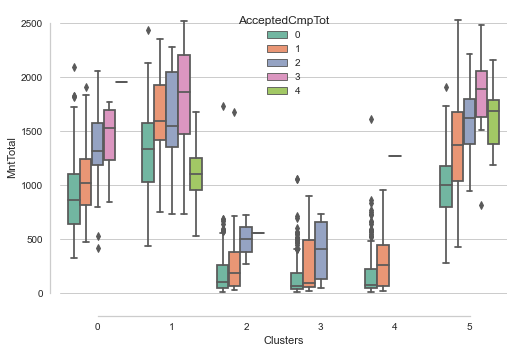

In [144]:
sns.boxplot(x="Clusters", y="MntTotal",
            hue="AcceptedCmpTot", palette=palette,
            data=df)
sns.despine(offset=10, trim=True)
## Cluster 2 spend a lot and accept many promotions

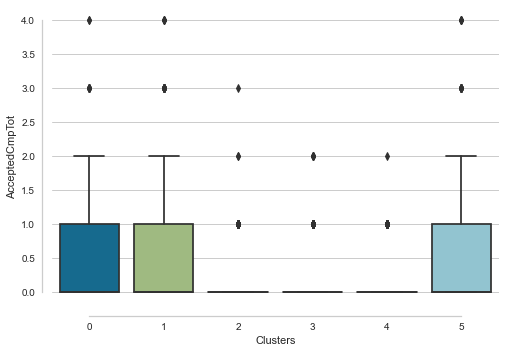

In [77]:
sns.boxplot(x="Clusters", y="AcceptedCmpTot",
            #hue="AcceptedCmpTot", palette=palette,
            data=df)
sns.despine(offset=10, trim=True)
## Cluster 2 spend a lot and accept many promotions

### What about the amounts spent on other goods when normalized?

In [146]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Income',
       'LogIncome', 'NumChildren', 'HasChildren', 'Solitary', 'age',
       'MntTotal', 'AcceptedCmpTot', 'NumTotalPurchases', 'Len_Customer',
       'MntSpentNorm', 'Clusters', 'MntWinesNorm', 'MntFruitsNorm',
       'MntMeatProductsNorm', 'MntFishProductsNorm', 'MntSweetProductsNorm',
       'MntGoldProdsNorm', 'NumDealsPurchasesNorm', 'NumWebPurchasesNorm',
       'NumStorePurchasesNorm', 'NumWebVisitsMonthNorm',
       'NumCatalogPurchasesNorm'],
      dtype='object')

In [147]:
# df['AcceptedCmpTotNorm']=df['AcceptedCmpTot']/df['Len_Customer'] Don't do that!


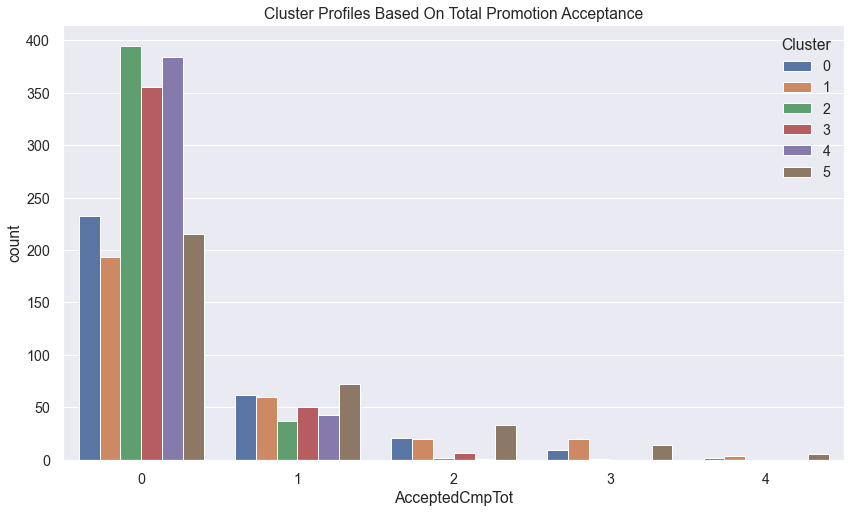

In [139]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["AcceptedCmpTot"],hue=df["Clusters"])

plt.title("Cluster Profiles Based On Total Promotion Acceptance")
plt.legend(title='Cluster',loc=1)
plt.savefig('./figures/num_total_acceptance.png')

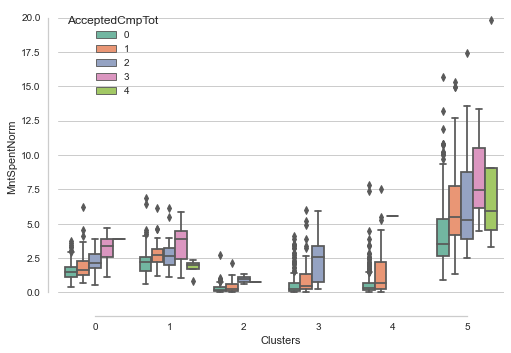

In [150]:
sns.boxplot(x="Clusters", y="MntSpentNorm",
            hue="AcceptedCmpTot", palette=palette,
            data=df)
sns.despine(offset=10, trim=True)
## Cluster 2 spend a lot and accept many promotions

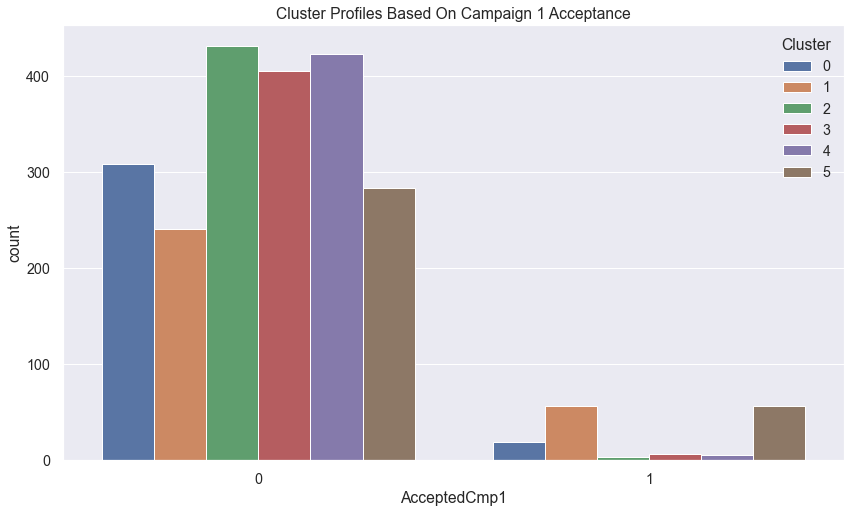

In [140]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["AcceptedCmp1"],hue=df["Clusters"])

plt.title("Cluster Profiles Based On Campaign 1 Acceptance")
plt.legend(title='Cluster',loc=1)
plt.savefig('./figures/cmp1_acceptance.png')

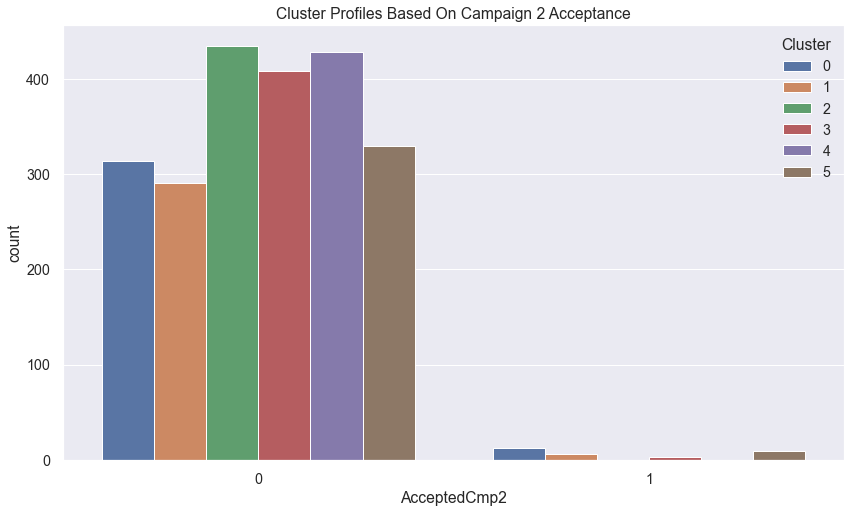

In [141]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["AcceptedCmp2"],hue=df["Clusters"])

plt.title("Cluster Profiles Based On Campaign 2 Acceptance")
plt.legend(title='Cluster',loc=1)
plt.savefig('./figures/cmp2_acceptance.png')

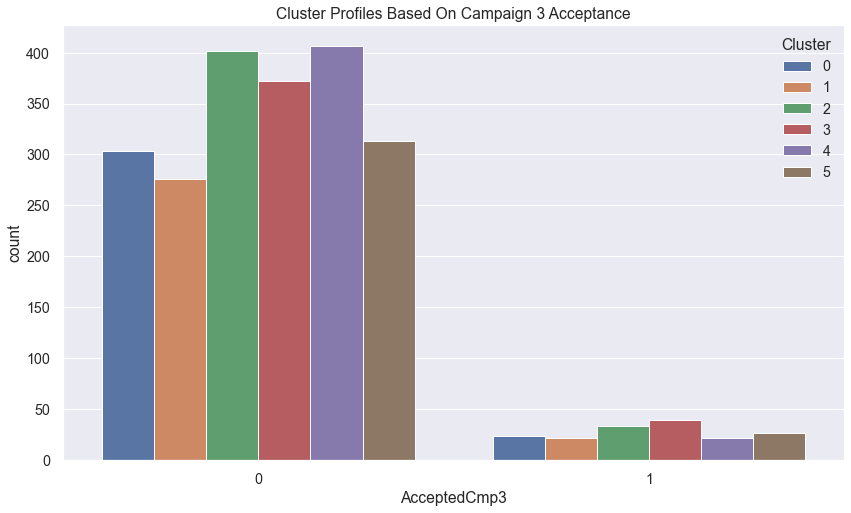

In [142]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["AcceptedCmp3"],hue=df["Clusters"])

plt.title("Cluster Profiles Based On Campaign 3 Acceptance")
plt.legend(title='Cluster',loc=1)
plt.savefig('./figures/cmp3_acceptance.png')

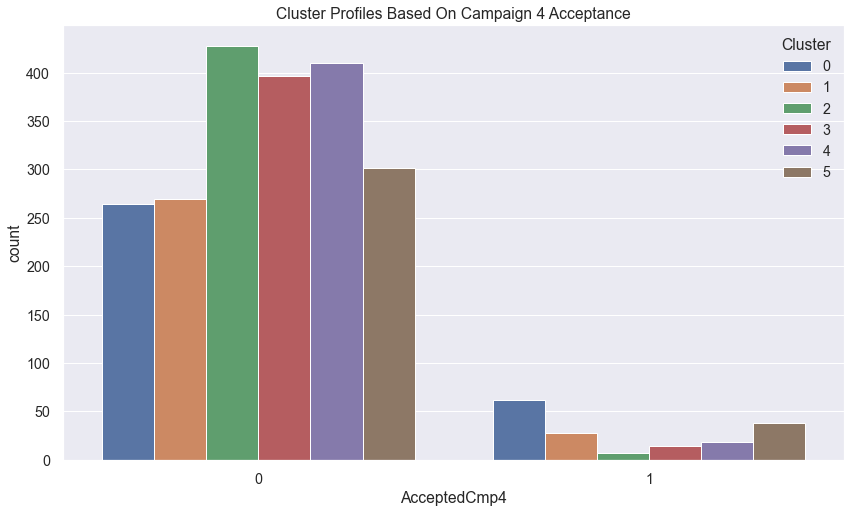

In [143]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["AcceptedCmp4"],hue=df["Clusters"])

plt.title("Cluster Profiles Based On Campaign 4 Acceptance")
plt.legend(title='Cluster',loc=1)
plt.savefig('./figures/cmp4_acceptance.png')

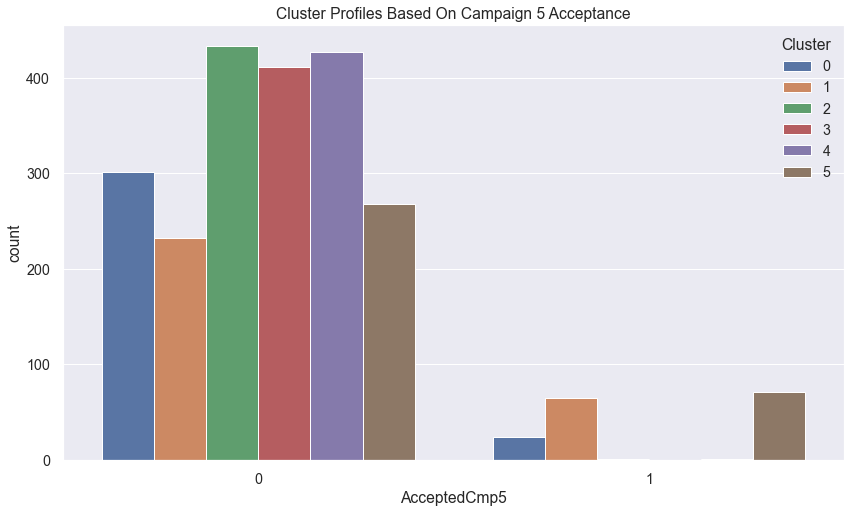

In [144]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["AcceptedCmp5"],hue=df["Clusters"])

plt.title("Cluster Profiles Based On Campaign 5 Acceptance")
plt.legend(title='Cluster',loc=1)
plt.savefig('./figures/cmp5_acceptance.png')

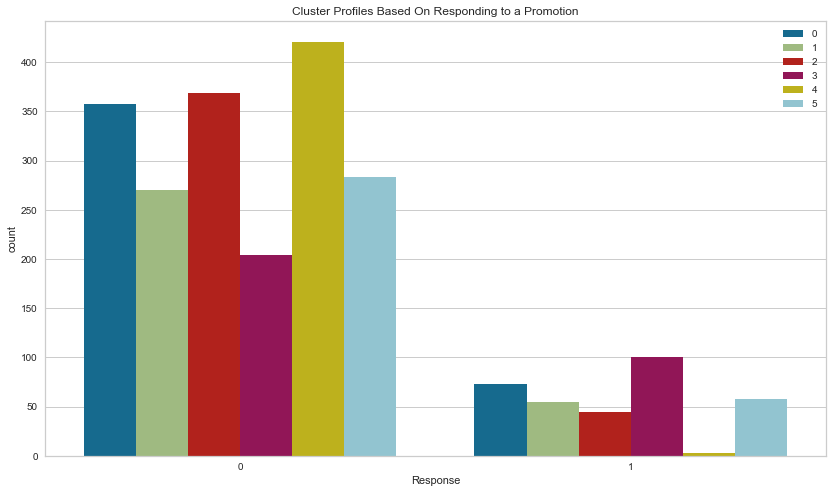

In [71]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["Response"],hue=df["Clusters"])

plot.set_title("Cluster Profiles Based On Responding to a Promotion")
plt.legend()
plt.show()

### Not sure if 'Response' is particularly meaningful

## Analysis before dropping the age outliers

### Cluster 4 is the most responsive to promotions.  Who are these customers?
- Upper middle class
- College educated or above, with a heavy represenation of people with PhDs
- Mostly married or living together
- Are less likely to have children than average, and have fewer children
- Story: Highly educated professors and professionals -> The "Strivers"
- We don't know much about these promotions, but perhaps they are for wines, meats, and more expensive items

### Cluster 1 are the repeated deal hunters.  Who are they?
- Higher than average income (.5 standard dev)
- Highly educated (lots of PhDs)
- Overwhelmingly have children
- The 'Familied Philosophers'

In [ ]:
<!-- # Description of Customer Characteristics
- Cluster 0: Lowest median income of all clusters (1 std to the left). The biggest cluster.
- Cluster 1: High median income (1 std to the right)
- Cluster 2: Lower than average median income (1 std to the left)
- Cluster 3: Lower than average median income (.5 std to the left)
- Cluster 4: Lower than average median income (.5 std to the left)
- Cluster 5: Highish median income (.5 std to the right)
- All clusters similar in age, with Cluster 0 slightly younger  -->

#### Recommend A/B testing on clusters